In [1]:
pip freeze

alembic==1.8.1
anyio==3.6.2
appdirs==1.4.4
appnope==0.1.3
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
astroid==2.5.6
asttokens==2.1.0
attrs==22.1.0
Babel==2.11.0
backcall==0.2.0
banal==1.0.6
beautifulsoup4==4.11.1
bleach==5.0.1
cachetools==5.0.0
certifi==2021.10.8
cffi==1.15.1
charset-normalizer==2.0.12
click==7.1.2
click-repl==0.2.0
comm==0.2.0
contourpy==1.2.0
cycler==0.12.1
dataset==1.5.2
debugpy==1.6.3
decorator==5.1.1
defusedxml==0.7.1
docopt==0.6.2
entrypoints==0.4
executing==1.2.0
fastapi==0.65.1
fastjsonschema==2.16.2
fonttools==4.44.0
google-auth==2.6.6
greenlet==2.0.1
h11==0.12.0
idna==3.3
importlib-metadata==5.1.0
importlib-resources==6.1.1
ipykernel==6.17.1
ipython==8.6.0
ipython-genutils==0.2.0
ipywidgets==8.1.1
isort==5.8.0
jedi==0.18.2
Jinja2==3.1.1
json5==0.9.10
jsonschema==4.17.1
jupyter-server==1.23.3
jupyter_client==7.4.7
jupyter_core==5.0.0
jupyterlab==3.5.0
jupyterlab-pygments==0.2.2
jupyterlab-widgets==3.0.9
jupyterlab_server==2.16.3
kiwisolver==1.4.5
kuberne

In [2]:
import os

import SimpleITK as sitk
import six

import matplotlib.pyplot as plt
import numpy as np

In [3]:
db_path = '/Users/verenaojeda/RICSE/data_analysis/FullDataset/VOIs'
imageDirectory = 'image'
maskDirectory =  'nodule_mask'
imageName = os.path.join(db_path, imageDirectory, 'LIDC-IDRI-0001_R_1.nii.gz')
maskName  = os.path.join(db_path, maskDirectory, 'LIDC-IDRI-0001_R_1.nii.gz')

imageITK = sitk.ReadImage(imageName)
maskITK = sitk.ReadImage(maskName)

# print(imageITK)
# print(maskITK)
# help(imageITK)
print(imageITK.GetSize())

print(imageITK.GetOrigin())
print(imageITK.GetSpacing())
print(imageITK.GetDirection())
print(imageITK.GetNumberOfComponentsPerPixel())

print(imageITK.GetWidth())
print(imageITK.GetHeight())
print(imageITK.GetDepth())

(53, 64, 11)
(39.3125, 63.14375305175781, -127.5)
(0.703125, 0.703125, 2.5)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
1
53
64
11


In [5]:
imageArr = sitk.GetArrayFromImage(imageITK)
print(imageArr)
maskArr = sitk.GetArrayFromImage(maskITK)
print(maskArr)

[[[-768 -509  -23 ... -852 -873 -898]
  [-800 -709 -238 ... -867 -895 -887]
  [-880 -876 -523 ... -894 -894 -864]
  ...
  [ 129  -20 -128 ...  -99  -82  -45]
  [ 835  769  716 ...  -85  -60  -70]
  [ 623  661  683 ...  -57  -44  -69]]

 [[-914 -800 -420 ... -889 -895 -890]
  [-920 -781 -323 ... -907 -903 -893]
  [-907 -776 -354 ... -909 -910 -909]
  ...
  [-180 -290 -345 ...   -7   -2  -18]
  [ 652  577  545 ...  -25  -21  -12]
  [ 622  623  642 ...  -32  -25  -23]]

 [[-919 -889 -852 ... -868 -853 -849]
  [-918 -887 -800 ... -876 -855 -844]
  [-919 -887 -759 ... -873 -854 -858]
  ...
  [-132 -232 -312 ...   21   18    7]
  [ 492  454  432 ...   -1   11   18]
  [ 691  682  658 ...  -10   -7   -5]]

 ...

 [[-858 -872 -856 ... -795 -829 -856]
  [-865 -859 -852 ... -802 -837 -869]
  [-887 -857 -854 ... -807 -805 -840]
  ...
  [ -32  -21   -5 ...   20   11   41]
  [  30   32   30 ...   36   67   69]
  [  26   33   30 ...   34   44   23]]

 [[-919 -933 -898 ... -830 -855 -867]
  [-911 -912

In [6]:
# sitk.Show(imageITK) # not possible here

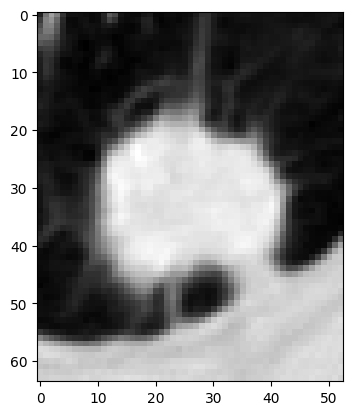

In [7]:
slice = sitk.GetArrayFromImage(imageITK)[6,:,:]
# img = np.asarray(slice)
# print(repr(img))
imgplot = plt.imshow(slice, cmap='gray')